In [1]:
# Importing Libraries
import pandas as pd 
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

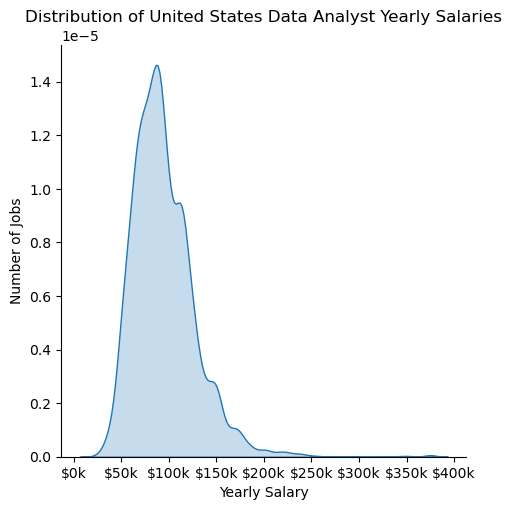

In [5]:

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()


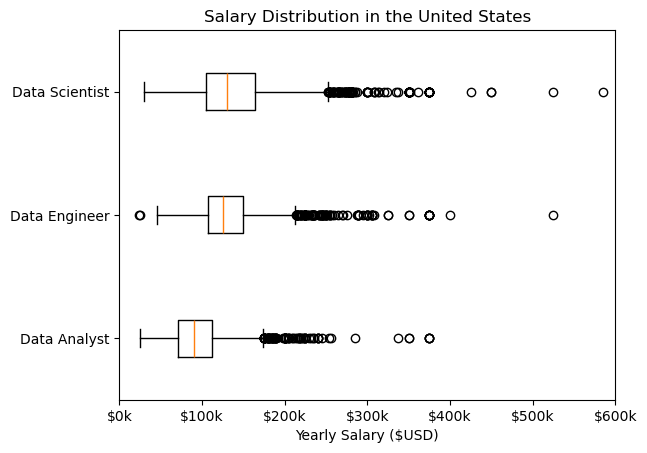

In [12]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

job_titles =['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
# Only get data analyst jobs
df_US = df[(df['job_title_short']).isin(job_titles) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title] ['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()

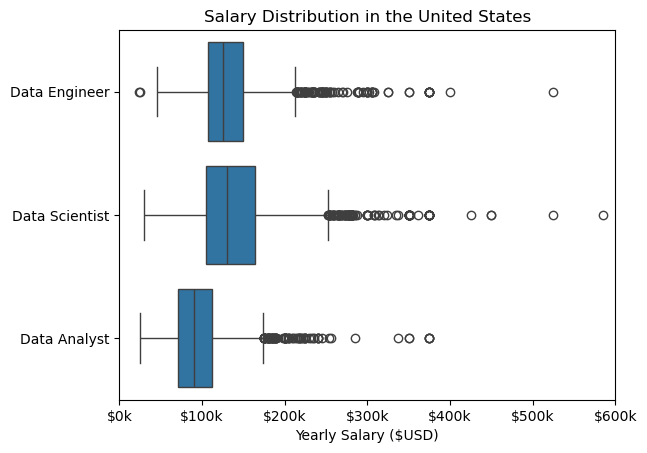

In [15]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k')
ax = plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0, 600000)
plt.show()